# Варiант 2
## Датасет: cifar10

### Завдання полягає у наступному.

1) Завантажте датасет, пiдготуйте його для входу в нейронну мережу.

2) Побудуйте щiльну нейронну мережу для класифiкацiї. Проведiть аналiз отриманих результатiв. Чи має мiсце перенавчання?

3) Побудуйте згорткову нейронну мережу. Проаналiзуйте чи змiнився
результат. З’ясуйте чи мало мiсце перенавчання.

4) Спробуйте покращити результати використавши рiзнi налаштування (рiзнi оптимiзатори, learning rate, batch size) а також додавши шари BatchNormalization та Dropout.

5) Проаналiзуйте процес навчання. Як змiнювалася похибка та точнiсть?

6) Напишiть висновок у якому Ви опишете отриманi результати.

### Також пропонується додаткове завдання. Завдання є опцiональним i виконується за бажанням студента.

7) Скачайте датасет
https://www.kaggle.com/c/dogs-vs-cats/data
що мiстить набiр зображень котiв та собак (розмiр датасету бiльше 800MB).

Побудуйте згорткову нейронну мережу для класифiкацiї. Використайте генератор для тренування даних (функцiя fit_generator, https://tensorflow.rstudio.com/reference/keras/fit_generator/).

Спробуйте досягнути точностi класифiкацiї на тестовiй вибiрцi у 83% або
вище. За потреби використайте аугментацiю.
Дана задача потребуватиме сучасної вiдеокарти, або Google Colab.

Додаткова iнформацiя
Dropout в r-keras: https://tensorflow.rstudio.com/reference/keras/layer_dropout/
BatchNormalization в r-keras: https://tensorflow.rstudio.com/reference/keras/layer_batch_normalization/
Дане завдання не вимагає особливих обчислювальних потужностей. Однак,
якщо виникає потреба (або бажання) можна використовувати Google Colab
(як для python так i для r).

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Завантажуємо датасет
## (CIFAR10 small images classification dataset)

In [28]:
from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 1), y_test: (10000, 1)


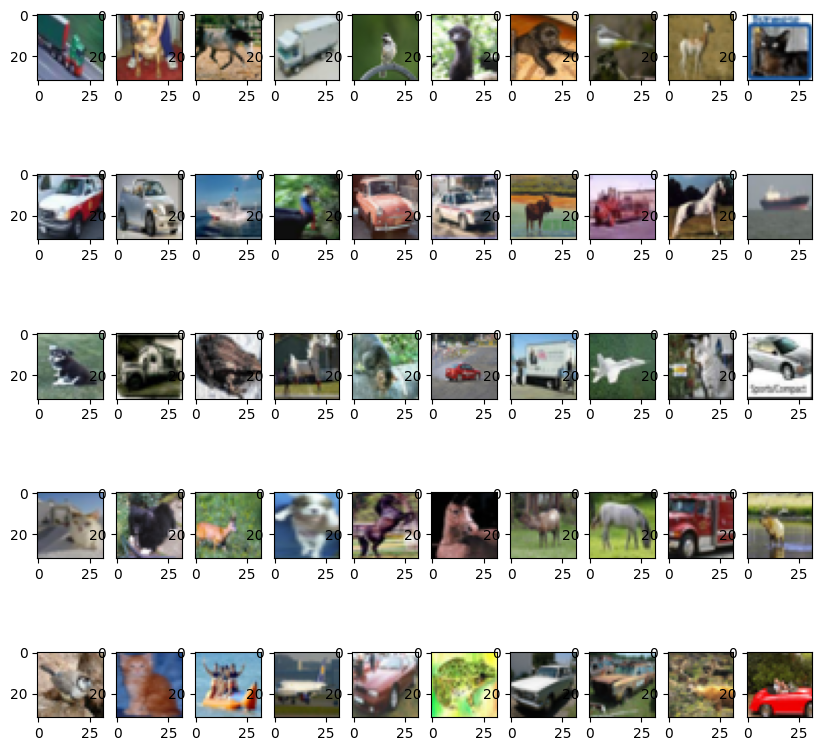

In [24]:
plt.figure(figsize=(10, 10))
for i in range(50, 100):
  plt.subplot(5, 10, i - 50 + 1)
  plt.subplots_adjust()
  plt.imshow(x_train[i], cmap=plt.cm.binary)


num_classes = 10
classes = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

# Нормалізація і зміна розмірності

In [29]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(f"x_train: {x_train.shape}, x_valid: {x_valid.shape}\ny_train: {y_train.shape}, y_valid: {y_valid.shape}")


x_train: (45000, 32, 32, 3), x_valid: (5000, 32, 32, 3)
y_train: (45000, 1), y_valid: (5000, 1)


In [30]:
x_train = x_train.reshape(45000, 1024, 3)
x_valid = x_valid.reshape(5000, 1024, 3)

x_train = x_train.reshape(45000, x_train.shape[1] * x_train.shape[2])
x_valid = x_valid.reshape(5000, x_valid.shape[1] * x_valid.shape[2])

x_test = x_test.reshape(10000, 1024, 3)

y_train = y_train.reshape(45000,)
y_valid = y_valid.reshape(5000,)


print(f"x_train: {x_train.shape}, x_valid: {x_valid.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_valid: {y_valid.shape}")

x_train: (45000, 3072), x_valid: (5000, 3072), x_test: (10000, 1024, 3)
y_train: (45000,), y_valid: (5000,)


In [31]:
from keras import utils


x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_valid = utils.to_categorical(y_valid, num_classes)

# Побудова ANN (Artificial Neural Network) - Нейронної мережі

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout


model = Sequential([
    Dense(800, activation="relu", input_shape=(3072,)),
    Dense(400, activation="relu"),
    Dense(10, activation="softmax"),
    Dropout(0.2)
])

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics


model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 800)               2458400   
                                                                 
 dense_73 (Dense)            (None, 400)               320400    
                                                                 
 dense_74 (Dense)            (None, 10)                4010      
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
Total params: 2782810 (10.62 MB)
Trainable params: 2782810 (10.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Навчання моделі

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size=880,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
41/41 [==============================] - 9s 221ms/step - loss: 4.1995 - accuracy: 0.4519 - val_loss: 1.4844 - val_accuracy: 0.4770
Epoch 2/50
41/41 [==============================] - 10s 257ms/step - loss: 4.2211 - accuracy: 0.4486 - val_loss: 1.6580 - val_accuracy: 0.4243
Epoch 3/50
41/41 [==============================] - 9s 208ms/step - loss: 4.1815 - accuracy: 0.4540 - val_loss: 1.5763 - val_accuracy: 0.4574
Epoch 4/50
41/41 [==============================] - 10s 245ms/step - loss: 4.2119 - accuracy: 0.4554 - val_loss: 1.5370 - val_accuracy: 0.4590
Epoch 5/50
41/41 [==============================] - 10s 245ms/step - loss: 4.1355 - accuracy: 0.4602 - val_loss: 1.5089 - val_accuracy: 0.4746
Epoch 6/50
41/41 [==============================] - 9s 208ms/step - loss: 4.1120 - accuracy: 0.4659 - val_loss: 1.5305 - val_accuracy: 0.4656
Epoch 7/50
41/41 [==============================] - 10s 242ms/step - loss: 4.1727 - accuracy: 0.4633 - val_loss: 1.4821 - val_accuracy: 0.4849
Ep

Text(0.5, 1.0, 'Графік тестових і навчальних точностей')

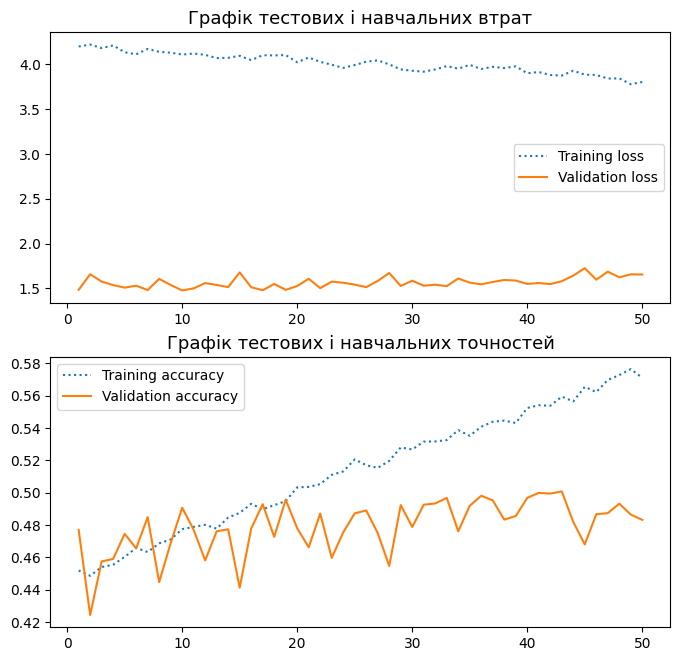

In [ ]:
history_dict = history.history


loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
accuracy_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

epochs = range(1, len(accuracy_values) + 1)

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
plt.subplots_adjust(top=1.3)
axs[0].plot(epochs, loss_values, linestyle=":", label="Training loss")
axs[0].plot(epochs, val_loss_values, label="Validation loss")
axs[0].legend()
axs[0].set_title("Графік тестових і навчальних втрат", fontsize=13)

axs[1].plot(epochs, accuracy_values, linestyle=":", label="Training accuracy")
axs[1].plot(epochs, val_acc_values, label="Validation accuracy")
axs[1].legend()
axs[1].set_title("Графік тестових і навчальних точностей", fontsize=13)


# Деякі висновки

#### 1) Насправді, модель навчається не дуже добре. Можливо, збільшивши кількість епох, вийшов би якийсь результат, але виглядає не надійно.

#### 2) Також, щоб досягти результату точності в 0.5711 прийшлося багато раз змінювати batch_size та просто перезапускати навчання моделі (без зміни batch_size).

#### 3) BatchNormalization і Dropout не допомагають, а іноді й роблять гірше.



---



# Побудова CNN (Convolutional Neural Network) - Згорткової нейронної мережі

In [37]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 1), y_test: (10000, 1)


In [38]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print(f"x_train: {x_train.shape}, x_valid: {x_valid.shape}\ny_train: {y_train.shape}, y_valid: {y_valid.shape}")

x_train: (45000, 32, 32, 3), x_valid: (5000, 32, 32, 3)
y_train: (45000, 1), y_valid: (5000, 1)


In [39]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_valid = x_valid.astype("float32") / 255

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
y_valid = utils.to_categorical(y_valid, num_classes)

print(f"y_train: {y_train.shape}, y_test: {y_test.shape}, y_valid: {y_valid.shape}")

y_train: (45000, 10), y_test: (10000, 10), y_valid: (5000, 10)


In [40]:
from keras.layers import Conv2D, MaxPooling2D, Flatten


model = Sequential([
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),

    Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=128, kernel_size=2, activation="relu"),

    Flatten(),

    Dense(255, activation="relu"),
    Dense(10, activation="softmax")

])

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         16512     
                                                                 
 flatten (Flatten)           (None, 6272)            

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=64)

Epoch 1/10
704/704 [==============================] - 94s 131ms/step - loss: 1.4352 - accuracy: 0.4855 - val_loss: 1.1603 - val_accuracy: 0.5930
Epoch 2/10
704/704 [==============================] - 86s 122ms/step - loss: 1.0492 - accuracy: 0.6307 - val_loss: 1.0423 - val_accuracy: 0.6350
Epoch 3/10
704/704 [==============================] - 86s 123ms/step - loss: 0.8809 - accuracy: 0.6921 - val_loss: 0.9181 - val_accuracy: 0.6798
Epoch 4/10
704/704 [==============================] - 86s 122ms/step - loss: 0.7427 - accuracy: 0.7391 - val_loss: 0.8510 - val_accuracy: 0.7008
Epoch 5/10
704/704 [==============================] - 87s 123ms/step - loss: 0.6320 - accuracy: 0.7793 - val_loss: 0.8260 - val_accuracy: 0.7140
Epoch 6/10
704/704 [==============================] - 87s 123ms/step - loss: 0.5232 - accuracy: 0.8173 - val_loss: 0.8410 - val_accuracy: 0.7248
Epoch 7/10
704/704 [==============================] - 86s 122ms/step - loss: 0.4069 - accuracy: 0.8581 - val_loss: 0.8636 - val_ac

## Хороші результати, але, можливо, ми маємо справу з перенавчанням, тому додамо Dropout

In [79]:
model = Sequential([
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=2, activation="relu"),

    Flatten(),

    Dense(255, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")

])

In [80]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [81]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 64)        16448     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 8, 8, 64)         

In [83]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=64)

Epoch 1/10
704/704 [==============================] - 112s 159ms/step - loss: 1.5768 - accuracy: 0.4265 - val_loss: 1.2316 - val_accuracy: 0.5660
Epoch 2/10
704/704 [==============================] - 110s 156ms/step - loss: 1.2300 - accuracy: 0.5616 - val_loss: 1.0652 - val_accuracy: 0.6264
Epoch 3/10
704/704 [==============================] - 111s 158ms/step - loss: 1.0689 - accuracy: 0.6206 - val_loss: 0.9169 - val_accuracy: 0.6792
Epoch 4/10
704/704 [==============================] - 119s 169ms/step - loss: 0.9632 - accuracy: 0.6580 - val_loss: 0.8526 - val_accuracy: 0.6948
Epoch 5/10
704/704 [==============================] - 111s 158ms/step - loss: 0.8877 - accuracy: 0.6856 - val_loss: 0.8312 - val_accuracy: 0.7090
Epoch 6/10
704/704 [==============================] - 111s 157ms/step - loss: 0.8289 - accuracy: 0.7067 - val_loss: 0.7870 - val_accuracy: 0.7232
Epoch 7/10
704/704 [==============================] - 112s 159ms/step - loss: 0.7782 - accuracy: 0.7258 - val_loss: 0.7896 -

In [84]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1407/1407 [==============================] - 30s 22ms/step - loss: 0.3924 - accuracy: 0.8725
Відсоток точності тестових даних:  73.96
Відсоток точності навчальних даних:  87.25


# Розпізнаємо клас

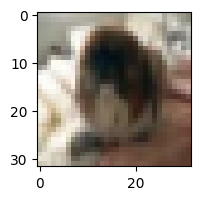

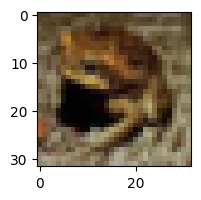

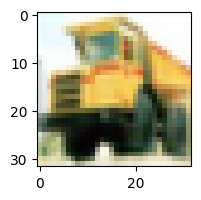

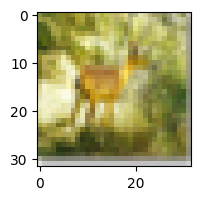

In [91]:
for n_img in range(200, 600, 100):
  plt.figure(figsize=(2, 2))
  plt.imshow(x_test[n_img].reshape(32, 32, 3), cmap=plt.cm.binary)
  plt.show()

In [92]:
for n_img in range(200, 600, 100):
  x = x_test[n_img]
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  prediction = np.argmax(prediction[0])
  print(f"Номер класу: {prediction}\nНазва: {classes[prediction]}")

1/1 [==============================] - 0s 23ms/step
Номер класу: 3
Назва: cat
1/1 [==============================] - 0s 22ms/step
Номер класу: 6
Назва: frog
1/1 [==============================] - 0s 24ms/step
Номер класу: 9
Назва: truck
1/1 [==============================] - 0s 23ms/step
Номер класу: 6
Назва: frog


# Висновок

1) **ANN**: Можливо, можна було перебрати параметри та зробити для навчання розмірність моделі Flatten(input_shape=(32, 32, 3)), проте все одно, звичайна нейронна мережа для розпізнавання картинок працює гірше за згорткову (CNN)

2) **CNN**: Згорткова нейронна мережа працює дуже добре. Для покращення accuracy, можливо, можна було змінювати параметри/шари, batch_size, Dropouts, а також кількість епох. Проте, з вигляду на якість картинок, дуже складно знайти баланс без перенавчання.



---



# Додаткове завдання
Скачайте датасет https://www.kaggle.com/c/dogs-vs-cats/data що мiстить набiр зображень котiв та собак (розмiр датасету бiльше 800MB).
Побудуйте згорткову нейронну мережу для класифiкацiї. Використайте генератор для тренування даних (функцiя fit_generator, https://tensorflow.rstudio.com/reference/keras/fit_generator/).

Спробуйте досягнути точностi класифiкацiї на тестовiй вибiрцi у 83% або вище. За потреби використайте аугментацiю. Дана задача потребуватиме сучасної вiдеокарти, або Google Colab.

In [ ]:
# Не можу завантажити, там якийсь permission, але воно мене не пропускає